In [9]:
import scipy.io
import numpy as np
import networkx as nx
import pickle
from sklearn.preprocessing import StandardScaler

num_conn = 0
num_amp = 900
num_psd = 450
num_relp = 210
num_total = num_conn+num_amp+num_psd+num_relp
subjects = 152

features = np.zeros((subjects,num_total))
amp_indices = range(num_conn,num_conn+num_amp)
psd_indices = range(num_conn+num_amp,num_conn+num_amp+num_psd)
relp_indices = range(num_conn+num_amp+num_psd,num_conn+num_amp+num_psd+num_relp)

for sub in range(1,subjects+1):
    filename = "resting_eeg_fconn_"+str(sub).zfill(4)+'.mat'

    try:
        amp_data = scipy.io.loadmat("exports/amp/sub-" + str(sub).zfill(4) + "_amp_data.mat")['magFeatures']
    except:
        print("ampcont",sub)
        continue

    try:
        psd_data = scipy.io.loadmat("exports/psd/sub-" + str(sub).zfill(4) + "_psd_data.mat")['psdFeatures']
    except:
        print("psdcont",sub)
        continue

    try:
        rel_power = scipy.io.loadmat("exports/rel_power/sub-" + str(sub).zfill(4) + "_rel_power.mat")['relPowFeatures']
    except:
        print("relcont",sub)
        continue

    amp_data_final = amp_data.flatten()
    psd_data_final = psd_data.flatten()
    relp_data_final = rel_power.flatten()

    if(amp_data_final.shape==(900,) and psd_data_final.shape==(450,) and relp_data_final.shape==(210,)):
        pass
    else:
        continue

    # print(amp_data_final.shape,psd_data_final.shape,relp_data_final.shape)

    # print(sub)
    features[sub-1][amp_indices] = amp_data_final
    features[sub-1][psd_indices] = psd_data_final
    features[sub-1][relp_indices] = relp_data_final

print(features)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
features = scaled
print(features)
np.savetxt('features.csv', features, delimiter=',')

ampcont 3
ampcont 54
ampcont 96
ampcont 119
[[3.97920074e+01 2.12264364e+01 2.16154809e-03 ... 8.98532228e-01
  2.05485651e+00 1.28650608e+00]
 [1.38327149e+01 9.11106752e+00 1.87682007e-03 ... 7.29207549e-01
  2.09297820e+00 1.52089119e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.03150182e+02 5.33565509e+01 1.53086097e-03 ... 1.32298954e+00
  1.09994280e+00 1.09762886e+00]
 [1.34558911e+02 3.67427653e+01 5.03998259e-03 ... 1.18682005e+00
  2.22352996e+00 7.21937739e-01]
 [2.23882215e+01 1.31484945e+01 4.03636286e-03 ... 8.63666487e-01
  1.43424475e+00 1.39845715e+00]]
[[-0.02331354  0.1861478  -0.05095686 ... -0.30849883  1.09503151
   0.4155161 ]
 [-0.41321265 -0.47125196 -0.14117812 ... -0.94260597  1.14321724
   0.86199673]
 [-0.62097498 -0.96563341 -0.73588271 ... -3.67342887 -1.50230289
  -2.03515159]
 ...
 [ 0.92830312  1.92958044 -0.25080155 ...  1.28105924 -0.11197746
   0.05572357]
 [ 1.40005078  1.02808922  

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('features.csv', delimiter=',')

print(data.shape)

(152, 1560)


In [11]:
data_info = pd.read_csv('data_info.csv',usecols=[0,1])
data_info = data_info.loc[:120]
data_filt = data_info.dropna()

labels = data_filt.values[:,1]
y = labels

dfX = pd.DataFrame(data)
subjects_list = data_filt['BASIC_INFO_ID'].unique().tolist()
sub_nums = [int(subject.split('-')[1]) for subject in subjects_list]
print(sub_nums)

arr = np.array(sub_nums)
existing_indices = arr - 1
dfXExisting = dfX.loc[existing_indices]
X = dfXExisting.values

X.shape,y.shape

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 38, 39, 43, 44, 45, 46, 47, 49, 50, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152]


((118, 1560), (118,))

In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train1, X_test1, y_train1, y_test1, indices_train, indices_test = train_test_split(X, y, np.arange(X.shape[0]), test_size=0.2, random_state=42)
print("Training set size:", X_train1.shape)
print("Testing set size:", X_test1.shape)

Training set size: (94, 1560)
Testing set size: (24, 1560)


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = 3
min_split = [20]
max_depths = [8]
n_estimators = 20
k = 4 # 0 means no augmentation

start = time.time()

tr_errors = []
errors = []
times = []
fimps = []

for m in min_split:
    # print("sigma = ",sigma)
    print("min_samples_split = ",m)
    for d in max_depths:
        print("max_depth = ",d)
        rfgs = RandomForestRegressor(n_estimators=n_estimators,max_depth=d,min_samples_split=m)
        kf = KFold(n_splits=8, shuffle=True)

        fold_errors = []
        fold_tr_errors = []
        fold_fimps = []
        
        for train_index, val_index in kf.split(X_train1):
            X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
            y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

            X_aug = []
            y_aug = []

            X_aug.append(X_train2)
            y_aug.append(y_train2)

            for _ in range(k):
                noisex = np.random.normal(loc=0, scale=sigmas, size=X_train2.shape)
                noisey = np.random.normal(loc=0, scale=sigmas, size=y_train2.shape)
                X_aug.append(X_train2 + noisex)
                y_aug.append(y_train2 + noisey)

            X_aug = np.concatenate(X_aug, axis=0)
            y_aug = np.concatenate(y_aug, axis=0)
            
            rfgs.fit(X_aug, y_aug)

            # print(rfgs.feature_importances_)
            fold_fimps.append(rfgs.feature_importances_)

            # print("Train error: ",mean_absolute_error(y_aug, rfgs.predict(X_aug)))
            fold_tr_errors.append(mean_absolute_error(y_aug, rfgs.predict(X_aug)))
            
            y_pred = rfgs.predict(X_val2)
            fold_error = mean_absolute_error(y_val2, y_pred)
            
            fold_errors.append(fold_error)
            # print("Validation error: ",fold_error)

        # for i, error in enumerate(fold_errors):
        #     print(f"Iteration {i+1}: Validation Error = {error}")

        avg_val_err = np.mean(fold_errors)
        print("Average validation error: ", avg_val_err)
        print("Median = ", np.median(fold_errors))
        end = time.time()
        print("Time: ",end-start)
        times.append(end-start)
        fimps.append(fold_fimps)
        errors.append((m,d,avg_val_err))
        tr_errors.append((m,d,np.mean(fold_tr_errors)))

min_samples_split =  20
max_depth =  8
Average validation error:  9.325149743125586
Median =  8.892289775840922
Time:  23.555392026901245


In [19]:
fold_errors

[9.00712970459672,
 8.609423528221123,
 7.060381825335757,
 15.086752948760191,
 7.6859389700111675,
 8.777449847085125,
 9.149626762967442,
 9.224494358027163]

In [21]:
fold_tr_errors

[5.37431003484711,
 5.151716114074095,
 5.240250796810722,
 4.85572858009997,
 5.282541137248824,
 5.047668278826557,
 5.292683319797446,
 5.310730672656165]

<BarContainer object of 1560 artists>

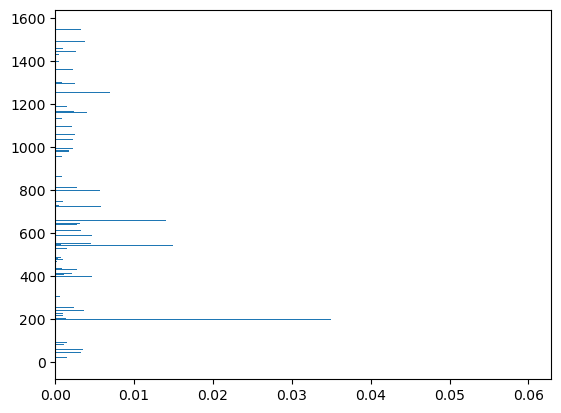

In [24]:
plt.barh(range(X_train2.shape[1]), fold_fimps[0])